# NFL Game Prediction - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on NFL game data to understand patterns and relationships that will inform our prediction model

## 1. Data Acquisition and Setup

In [1]:
# Import required libraries
from datetime import datetime, timedelta
import warnings

import matplotlib.pyplot as plt
import nfl_data_py as nfl
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

# Set display options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Set visualization style
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully
Pandas version: 1.5.3
NumPy version: 1.26.4


In [2]:
# Load NFL game data for 2023-2024 seasons
print("Loading NFL game data...")

# Import game data
games_2023 = nfl.import_schedules([2023])
games_2024 = nfl.import_schedules([2024])

# Combine data
games_raw = pd.concat([games_2023, games_2024], ignore_index=True)

# Filter for completed regular season and playoff games
games = games_raw[
    (games_raw["game_type"].isin(["REG", "POST"]))
    & (games_raw["home_score"].notna())
    & (games_raw["away_score"].notna())
].copy()

print(f"Total games loaded: {len(games)}")
print(f"Date range: {games['gameday'].min()} to {games['gameday'].max()}")
print(f"Seasons included: {sorted(games['season'].unique())}")

Loading NFL game data...
Total games loaded: 544
Date range: 2023-09-07 to 2025-01-05
Seasons included: [2023, 2024]


## 2. Initial Data Inspection

In [3]:
# Basic information about the dataset
print("Dataset Shape:", games.shape)
print("\nColumn Data Types:")
print(games.dtypes.value_counts())
print("\nFirst few rows:")
games.head()

Dataset Shape: (544, 46)

Column Data Types:
object     21
float64    18
int64       7
dtype: int64

First few rows:


,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,home_score,location,result,total,overtime,old_game_id,gsis,nfl_detail_id,pfr,pff,espn,ftn,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,roof,surface,temp,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
0,2023_01_DET_KC,2023,REG,1,2023-09-07,Thursday,20:20,DET,21.0,KC,20.0,Home,-1.0,41.0,0.0,2023090700,59173.0,NaN,202309070kan,NaN,401547353,NaN,7,7,164.0,-198.0,4.0,-110.0,-110.0,53.0,-110.0,-110.0,0,outdoors,NaN,NaN,NaN,00-0033106,00-0033873,Jared Goff,Patrick Mahomes,Dan Campbell,Andy Reid,John Hussey,KAN00,GEHA Field at Arrowhead Stadium
1,2023_01_CAR_ATL,2023,REG,1,2023-09-10,Sunday,13:00,CAR,10.0,ATL,24.0,Home,14.0,34.0,0.0,2023091000,59174.0,NaN,202309100atl,NaN,401547403,NaN,7,7,160.0,-192.0,3.5,-108.0,-112.0,40.5,-110.0,-110.0,1,closed,NaN,NaN,NaN,00-0039150,00-0038122,Bryce Young,Desmond Ridder,Frank Reich,Arthur Smith,Brad Rogers,ATL97,Mercedes-Benz Stadium
2,2023_01_HOU_BAL,2023,REG,1,2023-09-10,Sunday,13:00,HOU,9.0,BAL,25.0,Home,16.0,34.0,0.0,2023091001,59175.0,NaN,202309100rav,NaN,401547396,NaN,7,7,380.0,-500.0,9.5,-110.0,-110.0,43.5,-110.0,-110.0,0,outdoors,NaN,NaN,NaN,00-0039163,00-0034796,C.J. Stroud,Lamar Jackson,DeMeco Ryans,John Harbaugh,Tra Blake,BAL00,M&T Bank Stadium
3,2023_01_CIN_CLE,2023,REG,1,2023-09-10,Sunday,13:00,CIN,3.0,CLE,24.0,Home,21.0,27.0,0.0,2023091002,59176.0,NaN,202309100cle,NaN,401547397,NaN,7,7,-112.0,-108.0,-1.0,-105.0,-115.0,46.5,-110.0,-110.0,1,outdoors,NaN,NaN,NaN,00-0036442,00-0033537,Joe Burrow,Deshaun Watson,Zac Taylor,Kevin Stefanski,Clete Blakeman,CLE00,FirstEnergy Stadium
4,2023_01_JAX_IND,2023,REG,1,2023-09-10,Sunday,13:00,JAX,31.0,IND,21.0,Home,-10.0,52.0,0.0,2023091003,59177.0,NaN,202309100clt,NaN,401547404,NaN,7,7,-205.0,170.0,-4.0,-108.0,-112.0,45.5,-110.0,-110.0,1,closed,NaN,NaN,NaN,00-0036971,00-0039164,Trevor Lawrence,Anthony Richardson,Doug Pederson,Shane Steichen,Clay Martin,IND00,Lucas Oil Stadium


In [4]:
# Check for missing values
missing_data = games.isnull().sum()
missing_pct = (missing_data / len(games)) * 100

missing_df = pd.DataFrame(
    {
        "Missing_Count": missing_data[missing_data > 0],
        "Missing_Percentage": missing_pct[missing_data > 0],
    }
).sort_values("Missing_Percentage", ascending=False)

print("Columns with Missing Data:")
print(missing_df)

Columns with Missing Data:
               Missing_Count  Missing_Percentage
nfl_detail_id            544          100.000000
pff                      544          100.000000
ftn                      272           50.000000
temp                     221           40.625000
wind                     221           40.625000
surface                   37            6.801471


In [5]:
# Key columns for analysis
key_columns = [
    "game_id",
    'season',
    'week',
    'game_type',
    'gameday',
    'home_team',
    'away_team',
    'home_score',
    'away_score',
    'total',
    'overtime',
    'div_game',
    'roof',
    'surface',
    'temp',
    'wind',
    'home_coach',
    'away_coach',
    'home_qb_name',
    'away_qb_name',
    'stadium',
]

# Filter to available key columns
available_columns = [col for col in key_columns if col in games.columns]
games_analysis = games[available_columns].copy()

print(f"Working with {len(available_columns)} key columns")
print("Columns:", available_columns)

Working with 21 key columns
Columns: ['game_id', 'season', 'week', 'game_type', 'gameday', 'home_team', 'away_team', 'home_score', 'away_score', 'total', 'overtime', 'div_game', 'roof', 'surface', 'temp', 'wind', 'home_coach', 'away_coach', 'home_qb_name', 'away_qb_name', 'stadium']


## 3. Feature Engineering for EDA

In [6]:
# Create target variable and additional features
games_analysis['home_win'] = (games_analysis['home_score'] > games_analysis['away_score']).astype(
    int
)
games_analysis['point_differential'] = games_analysis['home_score'] - games_analysis['away_score']
games_analysis['total_points'] = games_analysis['home_score'] + games_analysis['away_score']
games_analysis['is_playoff'] = (games_analysis['game_type'] == 'POST').astype(int)

# Convert gameday to datetime
games_analysis['gameday'] = pd.to_datetime(games_analysis['gameday'])
games_analysis['day_of_week'] = games_analysis['gameday'].dt.day_name()
games_analysis['month'] = games_analysis['gameday'].dt.month

print("Features engineered successfully")
print(f"Home win rate: {games_analysis['home_win'].mean():.2%}")

Features engineered successfully
Home win rate: 54.41%


In [7]:
# Calculate rest days for each team
def calculate_rest_days(df):
    """Calculate days of rest between games for each team"""
    df = df.sort_values('gameday')

    # Create a list to store rest days
    home_rest = []
    away_rest = []

    # Track last game date for each team
    team_last_game = {}

    for idx, row in df.iterrows():
        home_team = row['home_team']
        away_team = row['away_team']
        game_date = row['gameday']

        # Calculate rest for home team
        if home_team in team_last_game:
            rest = (game_date - team_last_game[home_team]).days
            home_rest.append(rest)
        else:
            home_rest.append(7)  # Default rest for first game

        # Calculate rest for away team
        if away_team in team_last_game:
            rest = (game_date - team_last_game[away_team]).days
            away_rest.append(rest)
        else:
            away_rest.append(7)  # Default rest for first game

        # Update last game dates
        team_last_game[home_team] = game_date
        team_last_game[away_team] = game_date

    df['home_rest_days'] = home_rest
    df['away_rest_days'] = away_rest
    df['rest_advantage'] = df['home_rest_days'] - df['away_rest_days']

    return df


games_analysis = calculate_rest_days(games_analysis)
print("Rest days calculated successfully")

Rest days calculated successfully


## 4. Descriptive Statistics

In [8]:
# Numerical columns for statistical analysis
numerical_cols = [
    'home_score',
    'away_score',
    'point_differential',
    'total_points',
    'home_rest_days',
    'away_rest_days',
    'rest_advantage',
]

# Generate descriptive statistics
desc_stats = games_analysis[numerical_cols].describe().round(2)
print("Descriptive Statistics for Numerical Features:")
print(desc_stats)

Descriptive Statistics for Numerical Features:
       home_score  away_score  point_differential  total_points  \
count      544.00      544.00              544.00        544.00   
mean        23.48       21.20                2.28         44.68   
std         10.27        9.43               14.43         13.44   
min          0.00        0.00              -40.00          3.00   
25%         17.00       14.75               -6.00         36.00   
50%         23.00       20.00                2.00         44.00   
75%         30.00       28.00               10.00         52.00   
max         70.00       51.00               50.00         90.00   

       home_rest_days  away_rest_days  rest_advantage  
count          544.00          544.00          544.00  
mean            14.37           14.46           -0.09  
std             40.20           40.21            2.40  
min              4.00            4.00           -8.00  
25%              7.00            7.00            0.00  
50%          

In [9]:
# Additional statistical measures
print("\nAdditional Statistics:")
print("=" * 50)

for col in numerical_cols:
    data = games_analysis[col].dropna()
    print(f"\n{col}:")
    print(f"  Median: {data.median():.2f}")
    print(f"  Mode: {data.mode().values[0] if len(data.mode()) > 0 else 'N/A'}")
    print(f"  Variance: {data.var():.2f}")
    print(f"  Skewness: {data.skew():.2f}")
    print(f"  Kurtosis: {data.kurtosis():.2f}")


Additional Statistics:

home_score:
  Median: 23.00
  Mode: 20.0
  Variance: 105.49
  Skewness: 0.38
  Kurtosis: 0.82

away_score:
  Median: 20.00
  Mode: 20.0
  Variance: 88.93
  Skewness: 0.27
  Kurtosis: -0.22

point_differential:
  Median: 2.00
  Mode: -3.0
  Variance: 208.31
  Skewness: 0.20
  Kurtosis: 0.27

total_points:
  Median: 44.00
  Mode: 37.0
  Variance: 180.54
  Skewness: 0.35
  Kurtosis: 0.55

home_rest_days:
  Median: 7.00
  Mode: 7
  Variance: 1616.25
  Skewness: 5.56
  Kurtosis: 29.15

away_rest_days:
  Median: 7.00
  Mode: 7
  Variance: 1616.94
  Skewness: 5.56
  Kurtosis: 29.14

rest_advantage:
  Median: 0.00
  Mode: 0
  Variance: 5.74
  Skewness: -0.04
  Kurtosis: 3.80


## 5. Distribution Analysis - Numerical Features

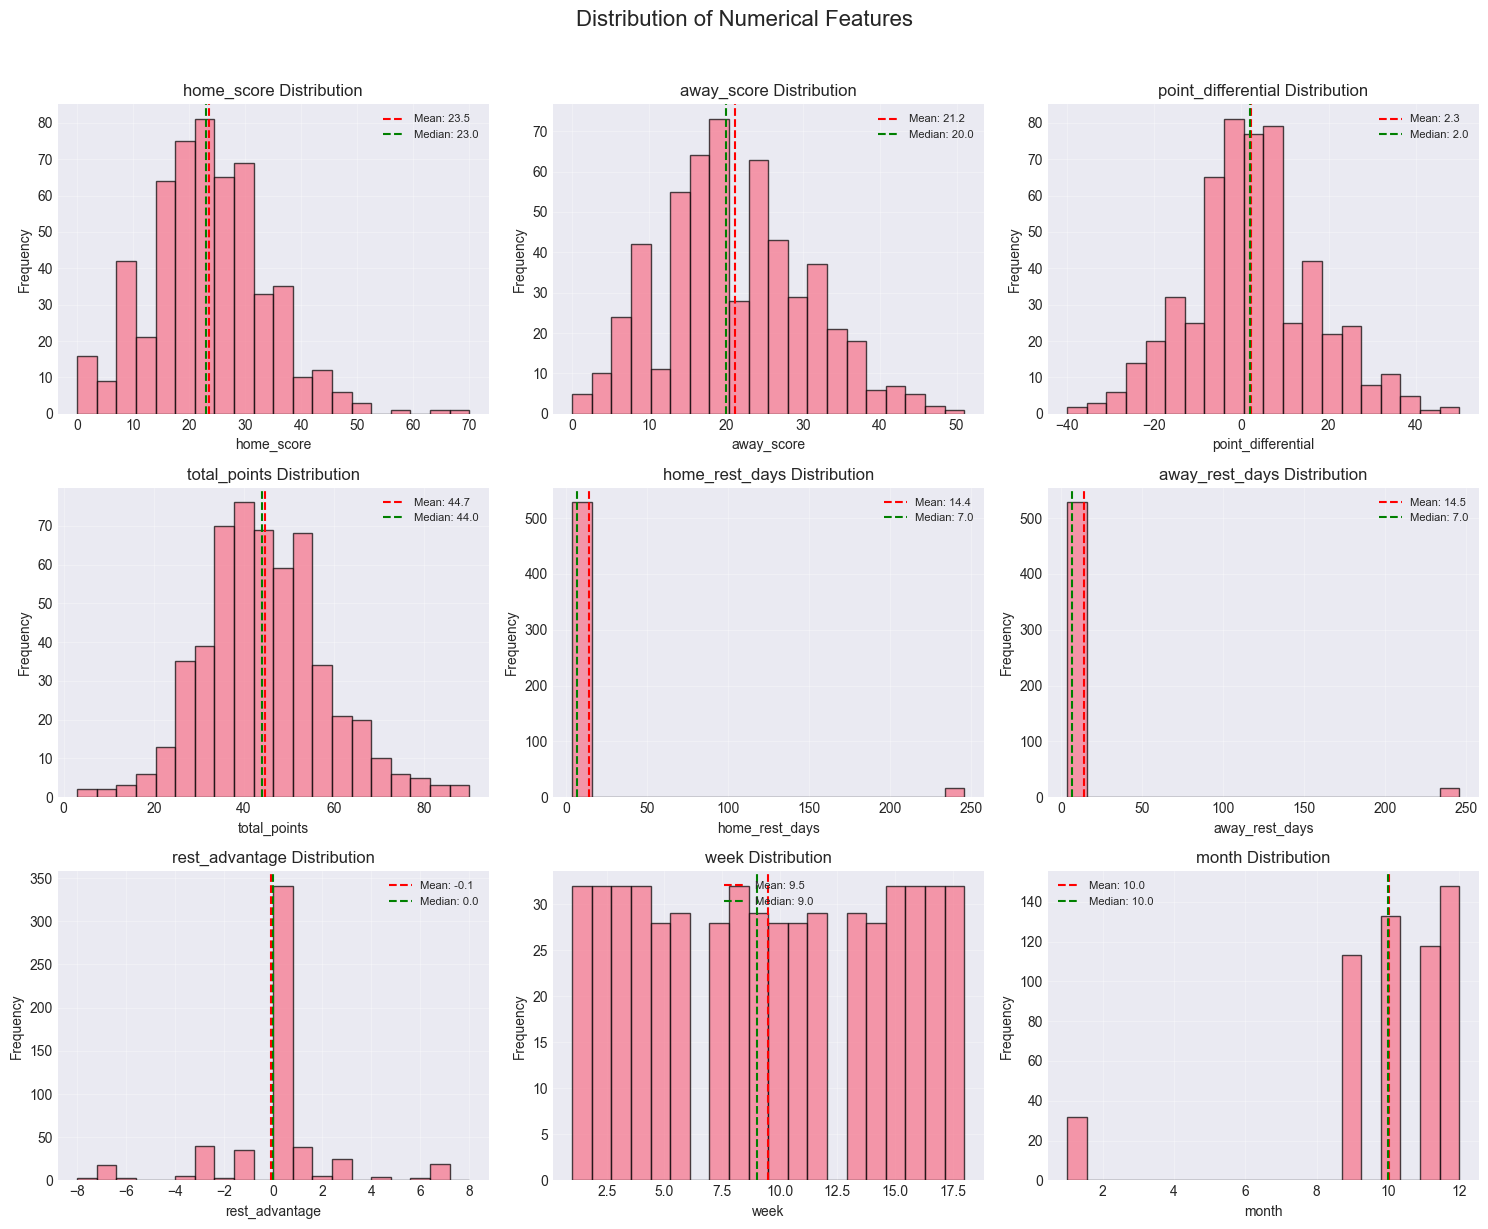

Distribution plots generated successfully


In [10]:
# Create distribution plots for numerical features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)

numerical_cols_plot = numerical_cols + ['week', 'month']

for idx, col in enumerate(numerical_cols_plot[:9]):
    row = idx // 3
    col_idx = idx % 3

    if col in games_analysis.columns:
        data = games_analysis[col].dropna()

        # Histogram with KDE
        axes[row, col_idx].hist(data, bins=20, edgecolor='black', alpha=0.7)
        axes[row, col_idx].axvline(
            data.mean(), color='red', linestyle='--', label=f'Mean: {data.mean():.1f}'
        )
        axes[row, col_idx].axvline(
            data.median(), color='green', linestyle='--', label=f'Median: {data.median():.1f}'
        )

        axes[row, col_idx].set_title(f'{col} Distribution')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Frequency')
        axes[row, col_idx].legend(fontsize=8)
        axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Distribution plots generated successfully")

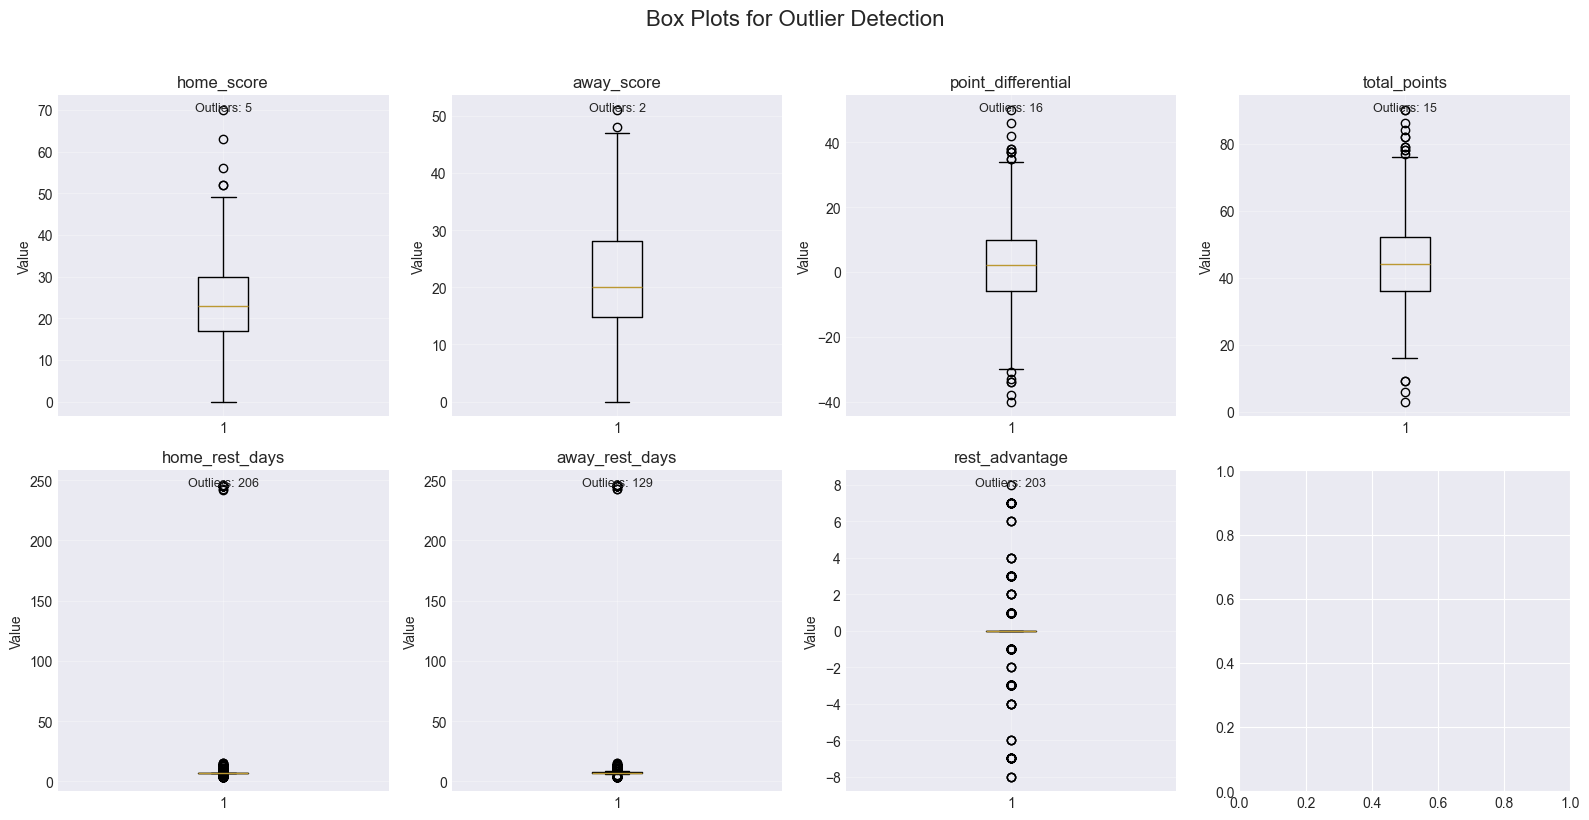

In [11]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Box Plots for Outlier Detection', fontsize=16, y=1.02)

for idx, col in enumerate(numerical_cols[:8]):
    row = idx // 4
    col_idx = idx % 4

    if col in games_analysis.columns:
        data = games_analysis[col].dropna()

        axes[row, col_idx].boxplot(data)
        axes[row, col_idx].set_title(f'{col}')
        axes[row, col_idx].set_ylabel('Value')
        axes[row, col_idx].grid(True, alpha=0.3)

        # Add outlier statistics
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)).sum()
        axes[row, col_idx].text(
            0.5,
            0.95,
            f'Outliers: {outliers}',
            transform=axes[row, col_idx].transAxes,
            ha='center',
            fontsize=9,
        )

plt.tight_layout()
plt.show()

## 6. Distribution Analysis - Categorical Features

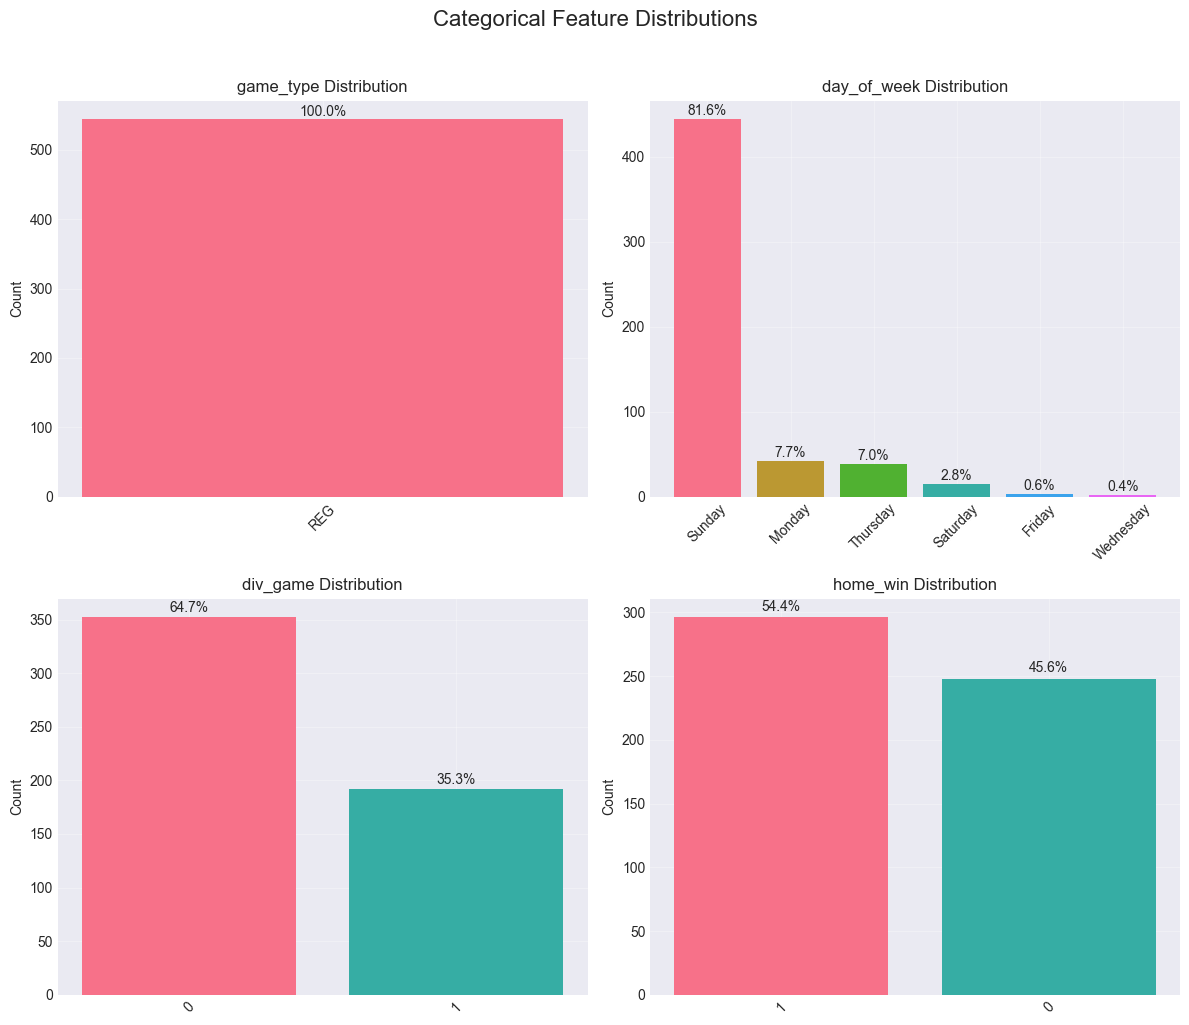

In [12]:
# Analyze categorical variables
categorical_cols = ['game_type', 'day_of_week', 'div_game', 'home_win']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Categorical Feature Distributions', fontsize=16, y=1.02)

for idx, col in enumerate(categorical_cols):
    row = idx // 2
    col_idx = idx % 2

    if col in games_analysis.columns:
        value_counts = games_analysis[col].value_counts()

        # Bar plot
        axes[row, col_idx].bar(
            range(len(value_counts)),
            value_counts.values,
            color=sns.color_palette('husl', len(value_counts)),
        )
        axes[row, col_idx].set_xticks(range(len(value_counts)))
        axes[row, col_idx].set_xticklabels(value_counts.index, rotation=45)
        axes[row, col_idx].set_title(f'{col} Distribution')
        axes[row, col_idx].set_ylabel('Count')
        axes[row, col_idx].grid(True, alpha=0.3)

        # Add percentage labels
        for i, (k, v) in enumerate(value_counts.items()):
            pct = v / len(games_analysis) * 100
            axes[row, col_idx].text(i, v + 5, f'{pct:.1f}%', ha='center')

plt.tight_layout()
plt.show()

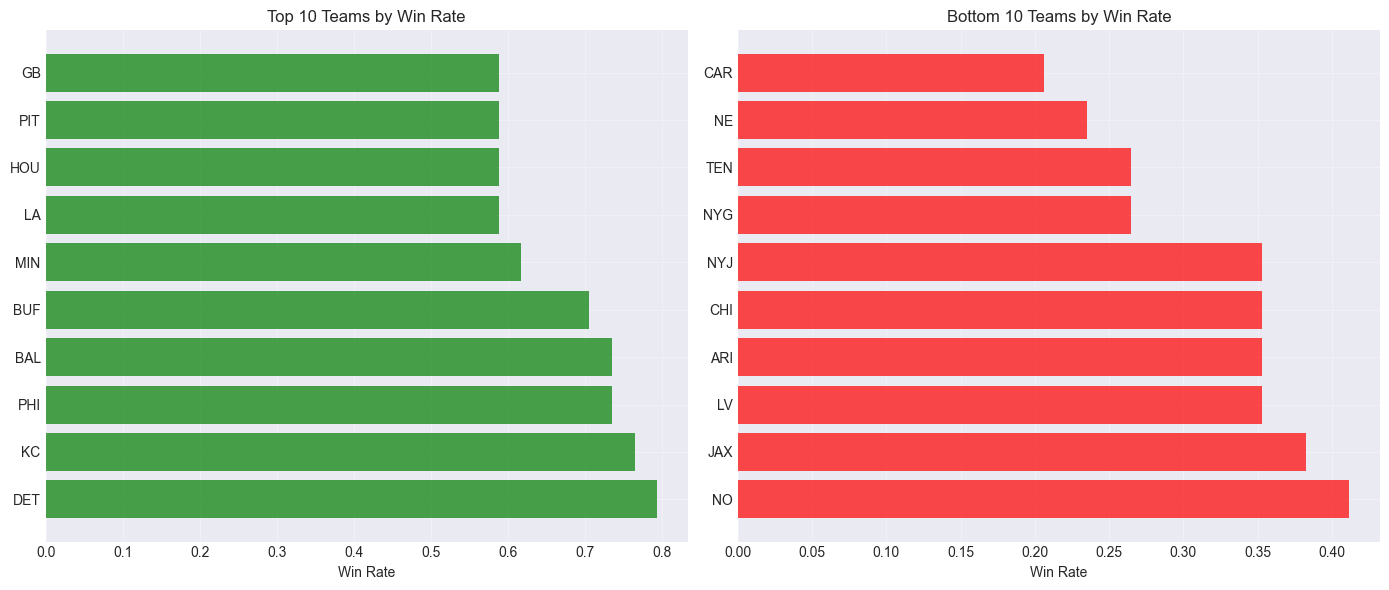


Team Performance Summary:
Best team: DET (79.41%)
Worst team: CAR (20.59%)


In [13]:
# Team performance analysis
# Calculate win rates for each team
home_wins = games_analysis.groupby('home_team')['home_win'].agg(['sum', 'count'])
away_wins = games_analysis.groupby('away_team').apply(
    lambda x: ((x['home_win'] == 0).sum(), len(x))
)

# Combine home and away performance
team_performance = pd.DataFrame()
for team in set(
    list(games_analysis['home_team'].unique()) + list(games_analysis['away_team'].unique())
):
    home_record = (
        home_wins.loc[team] if team in home_wins.index else pd.Series({'sum': 0, 'count': 0})
    )
    away_record = away_wins.loc[team] if team in away_wins.index else (0, 0)

    total_wins = home_record['sum'] + away_record[0]
    total_games = home_record['count'] + away_record[1]

    team_performance = pd.concat(
        [
            team_performance,
            pd.DataFrame(
                {
                    'team': [team],
                    'wins': [total_wins],
                    'games': [total_games],
                    'win_rate': [total_wins / total_games if total_games > 0 else 0],
                }
            ),
        ],
        ignore_index=True,
    )

# Sort by win rate
team_performance = team_performance.sort_values('win_rate', ascending=False)

# Plot top and bottom performers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Top 10 teams
top_teams = team_performance.head(10)
ax1.barh(range(len(top_teams)), top_teams['win_rate'], color='green', alpha=0.7)
ax1.set_yticks(range(len(top_teams)))
ax1.set_yticklabels(top_teams['team'])
ax1.set_xlabel('Win Rate')
ax1.set_title('Top 10 Teams by Win Rate')
ax1.grid(True, alpha=0.3)

# Bottom 10 teams
bottom_teams = team_performance.tail(10)
ax2.barh(range(len(bottom_teams)), bottom_teams['win_rate'], color='red', alpha=0.7)
ax2.set_yticks(range(len(bottom_teams)))
ax2.set_yticklabels(bottom_teams['team'])
ax2.set_xlabel('Win Rate')
ax2.set_title('Bottom 10 Teams by Win Rate')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTeam Performance Summary:")
print(f"Best team: {team_performance.iloc[0]['team']} ({team_performance.iloc[0]['win_rate']:.2%})")
print(
    f"Worst team: {team_performance.iloc[-1]['team']} ({team_performance.iloc[-1]['win_rate']:.2%})"
)

## 7. Correlation Analysis

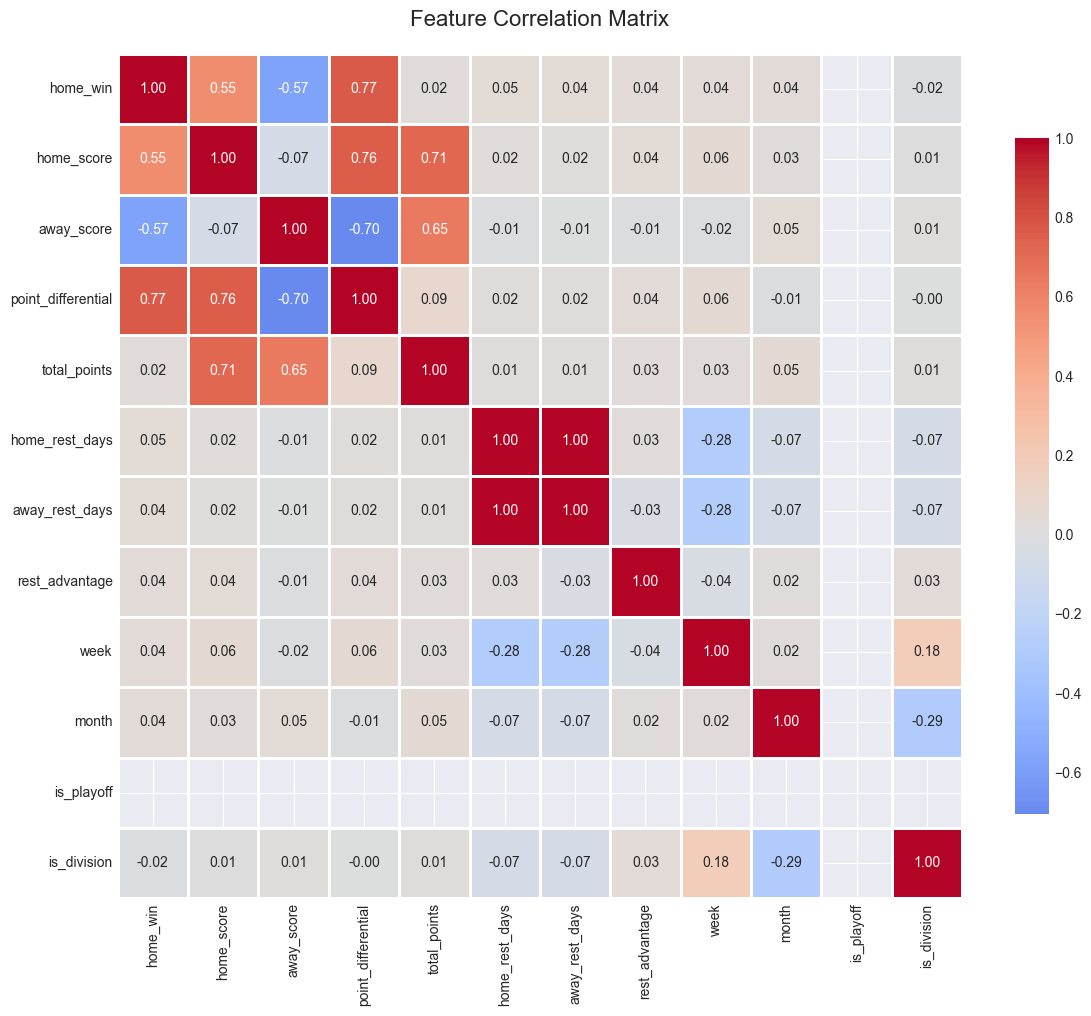

Correlation analysis completed


In [14]:
# Prepare data for correlation analysis
correlation_features = [
    'home_win',
    'home_score',
    'away_score',
    'point_differential',
    'total_points',
    'home_rest_days',
    'away_rest_days',
    'rest_advantage',
    'week',
    'month',
    'is_playoff',
]

# Add division game as binary
if 'div_game' in games_analysis.columns:
    games_analysis['is_division'] = games_analysis['div_game'].astype(int)
    correlation_features.append('is_division')

# Select available features
available_corr_features = [f for f in correlation_features if f in games_analysis.columns]
corr_data = games_analysis[available_corr_features].dropna()

# Calculate correlation matrix
correlation_matrix = corr_data.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
)
plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("Correlation analysis completed")


Features Most Correlated with Home Win:
point_differential   : +0.768
home_score           : +0.554
home_rest_days       : +0.047
away_rest_days       : +0.045
week                 : +0.040
month                : +0.040
rest_advantage       : +0.036
total_points         : +0.022
is_division          : -0.019
away_score           : -0.572
is_playoff           : +nan


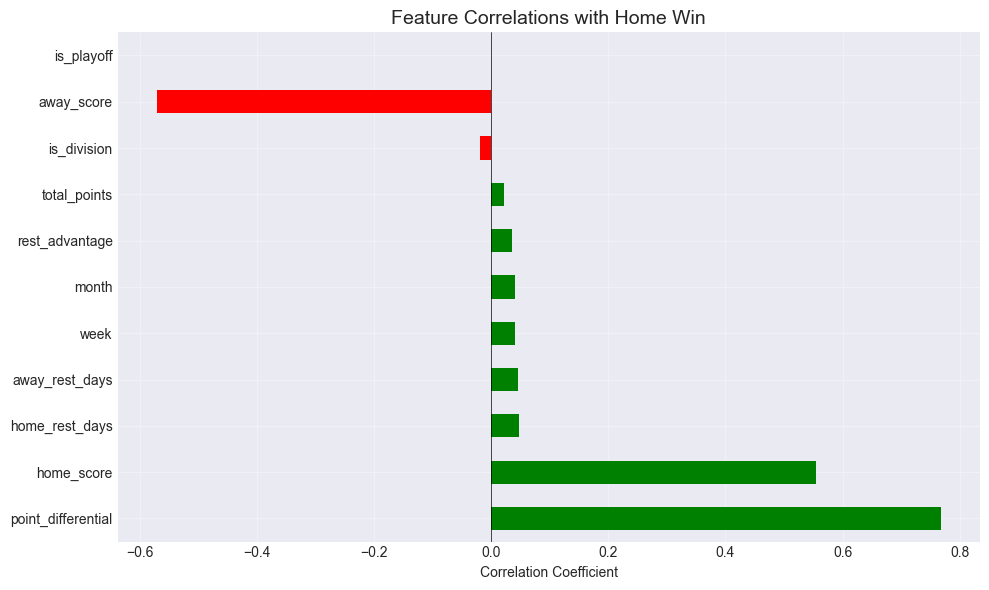

In [15]:
# Find strongest correlations with home_win
home_win_corr = correlation_matrix['home_win'].sort_values(ascending=False)

print("\nFeatures Most Correlated with Home Win:")
print("=" * 50)
for feature, corr in home_win_corr.items():
    if feature != 'home_win':
        print(f"{feature:20} : {corr:+.3f}")

# Visualize correlations with target
fig, ax = plt.subplots(figsize=(10, 6))
home_win_corr_filtered = home_win_corr[home_win_corr.index != 'home_win']
colors = ['green' if x > 0 else 'red' for x in home_win_corr_filtered]
home_win_corr_filtered.plot(kind='barh', color=colors, ax=ax)
ax.set_title('Feature Correlations with Home Win', fontsize=14)
ax.set_xlabel('Correlation Coefficient')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Advanced Visualizations

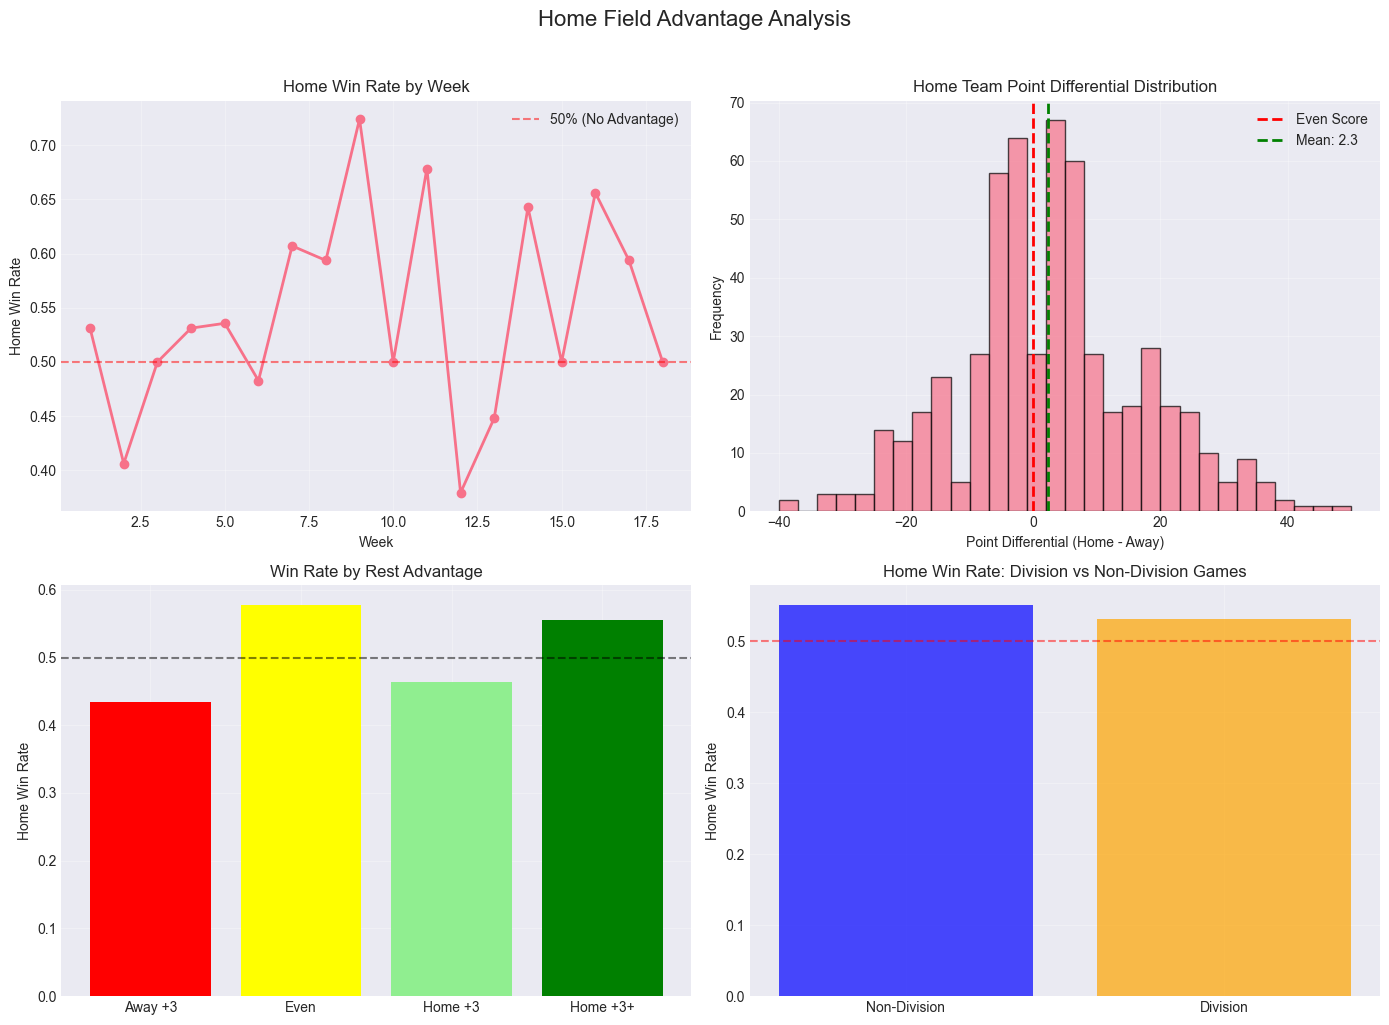

In [16]:
# Home advantage visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Home Field Advantage Analysis', fontsize=16, y=1.02)

# 1. Home win rate by week
weekly_home_wins = games_analysis.groupby('week')['home_win'].mean()
axes[0, 0].plot(weekly_home_wins.index, weekly_home_wins.values, marker='o', linewidth=2)
axes[0, 0].axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='50% (No Advantage)')
axes[0, 0].set_title('Home Win Rate by Week')
axes[0, 0].set_xlabel('Week')
axes[0, 0].set_ylabel('Home Win Rate')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Point differential distribution
axes[0, 1].hist(games_analysis['point_differential'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Even Score')
mean_diff = games_analysis['point_differential'].mean()
axes[0, 1].axvline(
    x=mean_diff, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_diff:.1f}'
)
axes[0, 1].set_title('Home Team Point Differential Distribution')
axes[0, 1].set_xlabel('Point Differential (Home - Away)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Rest advantage impact
rest_bins = [-10, -3, 0, 3, 10]
rest_labels = ['Away +3', 'Even', 'Home +3', 'Home +3+']
games_analysis['rest_category'] = pd.cut(
    games_analysis['rest_advantage'], bins=rest_bins, labels=rest_labels
)
rest_impact = games_analysis.groupby('rest_category')['home_win'].mean()
axes[1, 0].bar(
    range(len(rest_impact)), rest_impact.values, color=['red', 'yellow', 'lightgreen', 'green']
)
axes[1, 0].set_xticks(range(len(rest_impact)))
axes[1, 0].set_xticklabels(rest_impact.index)
axes[1, 0].axhline(y=0.5, color='black', linestyle='--', alpha=0.5)
axes[1, 0].set_title('Win Rate by Rest Advantage')
axes[1, 0].set_ylabel('Home Win Rate')
axes[1, 0].grid(True, alpha=0.3)

# 4. Division games vs non-division
if 'div_game' in games_analysis.columns:
    div_comparison = games_analysis.groupby('div_game')['home_win'].mean()
    axes[1, 1].bar(
        ['Non-Division', 'Division'], div_comparison.values, color=['blue', 'orange'], alpha=0.7
    )
    axes[1, 1].axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
    axes[1, 1].set_title('Home Win Rate: Division vs Non-Division Games')
    axes[1, 1].set_ylabel('Home Win Rate')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

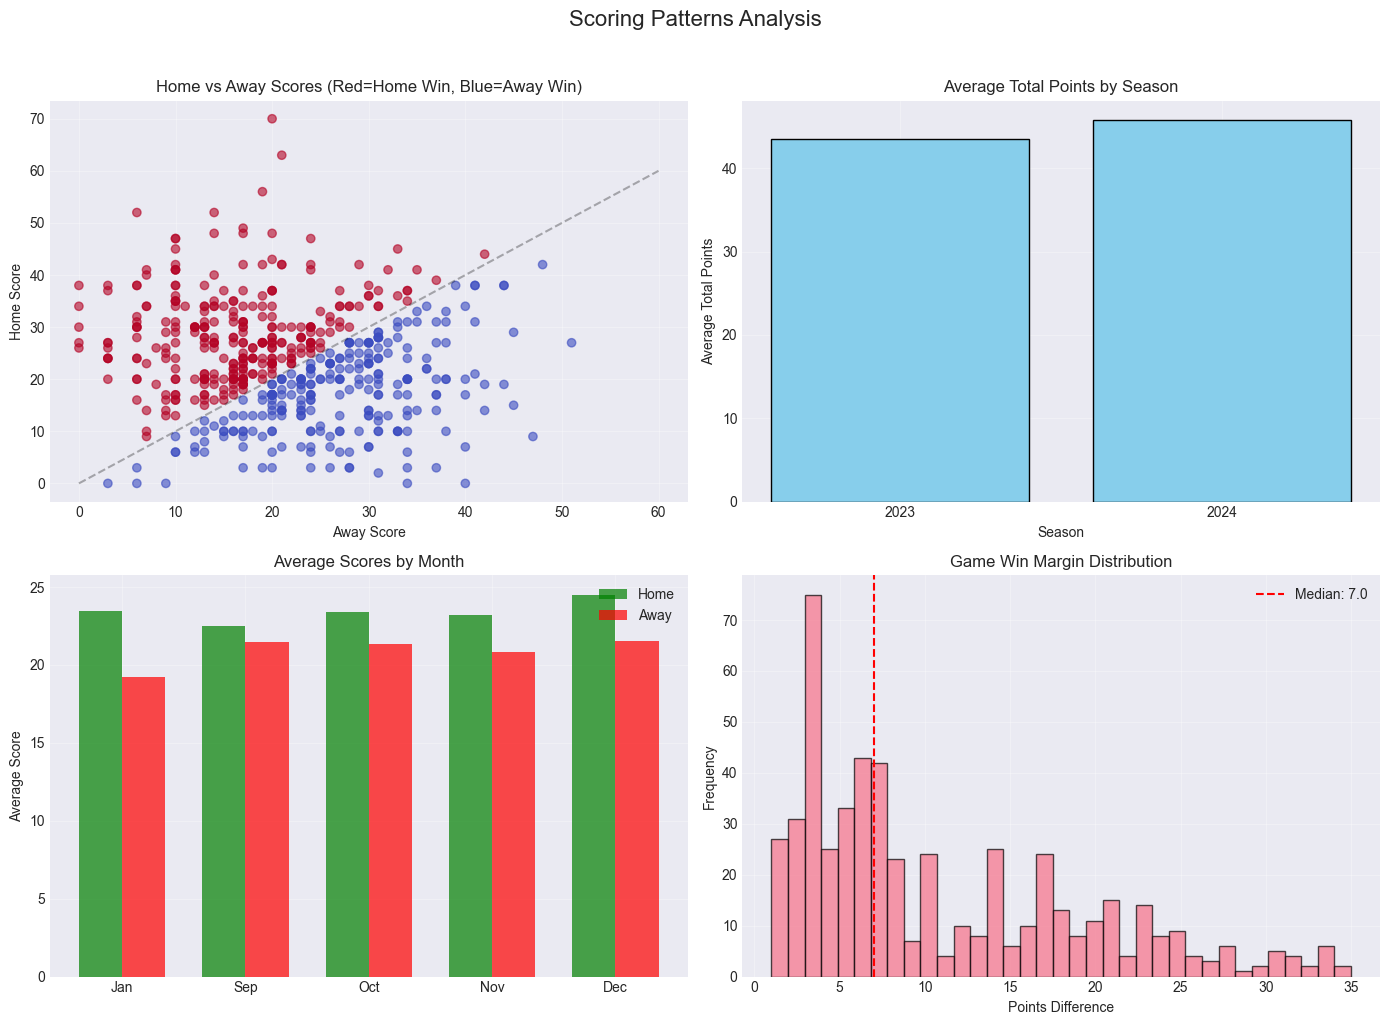

In [17]:
# Scoring patterns analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Scoring Patterns Analysis', fontsize=16, y=1.02)

# 1. Home vs Away scores scatter
axes[0, 0].scatter(
    games_analysis['away_score'],
    games_analysis['home_score'],
    c=games_analysis['home_win'],
    cmap='coolwarm',
    alpha=0.6,
)
axes[0, 0].plot([0, 60], [0, 60], 'k--', alpha=0.3)  # Diagonal line
axes[0, 0].set_xlabel('Away Score')
axes[0, 0].set_ylabel('Home Score')
axes[0, 0].set_title('Home vs Away Scores (Red=Home Win, Blue=Away Win)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Total points by season
seasonal_scoring = games_analysis.groupby('season')['total_points'].mean()
axes[0, 1].bar(
    seasonal_scoring.index.astype(str), seasonal_scoring.values, color='skyblue', edgecolor='black'
)
axes[0, 1].set_title('Average Total Points by Season')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('Average Total Points')
axes[0, 1].grid(True, alpha=0.3)

# 3. Scoring by month
monthly_scoring = games_analysis.groupby('month').agg({'home_score': 'mean', 'away_score': 'mean'})
x = range(len(monthly_scoring))
width = 0.35
axes[1, 0].bar(
    [i - width / 2 for i in x],
    monthly_scoring['home_score'],
    width,
    label='Home',
    color='green',
    alpha=0.7,
)
axes[1, 0].bar(
    [i + width / 2 for i in x],
    monthly_scoring['away_score'],
    width,
    label='Away',
    color='red',
    alpha=0.7,
)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(['Jan', 'Sep', 'Oct', 'Nov', 'Dec'][: len(monthly_scoring)])
axes[1, 0].set_title('Average Scores by Month')
axes[1, 0].set_ylabel('Average Score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Win margin distribution
win_margins = games_analysis['point_differential'].abs()
axes[1, 1].hist(win_margins[win_margins <= 35], bins=35, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(
    win_margins.median(), color='red', linestyle='--', label=f'Median: {win_margins.median():.1f}'
)
axes[1, 1].set_title('Game Win Margin Distribution')
axes[1, 1].set_xlabel('Points Difference')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Rolling Performance Analysis

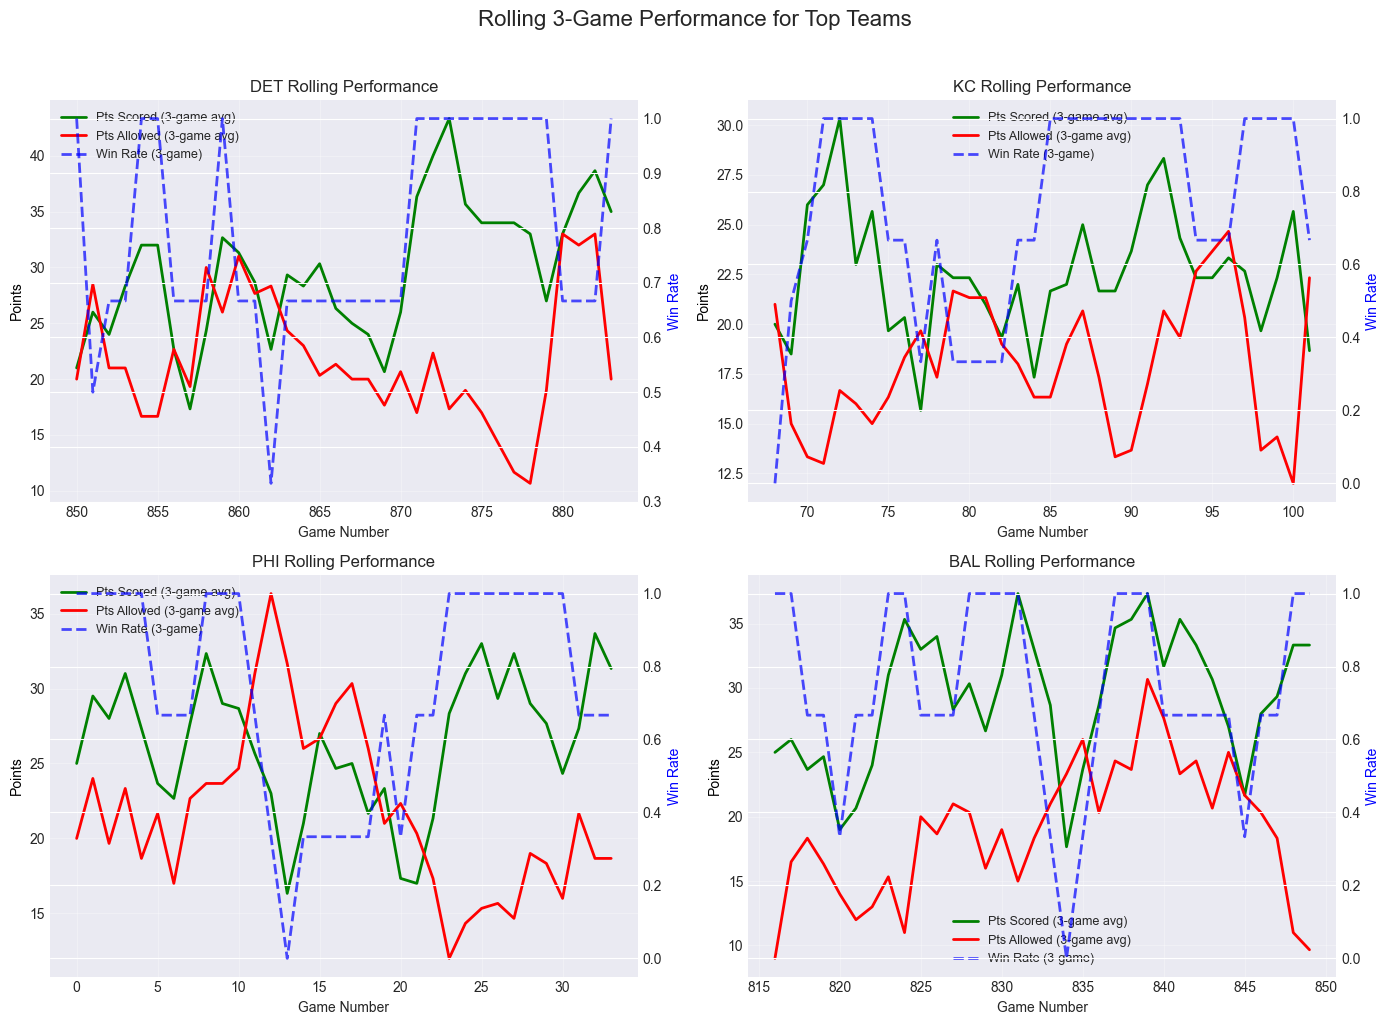

Rolling performance analysis completed


In [18]:
# Calculate rolling averages for team performance
def calculate_rolling_stats(df, window=3):
    """Calculate rolling performance statistics for teams"""
    df = df.sort_values('gameday')
    teams = list(set(list(df['home_team'].unique()) + list(df['away_team'].unique())))

    rolling_stats = []

    for team in teams:
        # Get all games for this team
        team_games = df[(df['home_team'] == team) | (df['away_team'] == team)].copy()

        # Calculate points scored and allowed
        team_games['points_scored'] = team_games.apply(
            lambda x: x['home_score'] if x['home_team'] == team else x['away_score'], axis=1
        )
        team_games['points_allowed'] = team_games.apply(
            lambda x: x['away_score'] if x['home_team'] == team else x['home_score'], axis=1
        )
        team_games['won'] = team_games.apply(
            lambda x: (x['home_win'] == 1 and x['home_team'] == team)
            or (x['home_win'] == 0 and x['away_team'] == team),
            axis=1,
        ).astype(int)

        # Calculate rolling averages
        team_games[f'rolling_pts_scored_{window}'] = (
            team_games['points_scored'].rolling(window=window, min_periods=1).mean()
        )
        team_games[f'rolling_pts_allowed_{window}'] = (
            team_games['points_allowed'].rolling(window=window, min_periods=1).mean()
        )
        team_games[f'rolling_win_rate_{window}'] = (
            team_games['won'].rolling(window=window, min_periods=1).mean()
        )

        team_games['team'] = team
        rolling_stats.append(team_games)

    return pd.concat(rolling_stats, ignore_index=True)


# Calculate rolling stats
rolling_df = calculate_rolling_stats(games_analysis, window=3)

# Visualize rolling performance for select teams
top_teams = team_performance.head(4)['team'].values

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Rolling 3-Game Performance for Top Teams', fontsize=16, y=1.02)

for idx, team in enumerate(top_teams):
    row = idx // 2
    col_idx = idx % 2

    team_data = rolling_df[rolling_df['team'] == team].sort_values('gameday')

    ax = axes[row, col_idx]
    ax2 = ax.twinx()

    # Plot rolling averages
    line1 = ax.plot(
        team_data.index,
        team_data['rolling_pts_scored_3'],
        'g-',
        label='Pts Scored (3-game avg)',
        linewidth=2,
    )
    line2 = ax.plot(
        team_data.index,
        team_data['rolling_pts_allowed_3'],
        'r-',
        label='Pts Allowed (3-game avg)',
        linewidth=2,
    )
    line3 = ax2.plot(
        team_data.index,
        team_data['rolling_win_rate_3'],
        'b--',
        label='Win Rate (3-game)',
        linewidth=2,
        alpha=0.7,
    )

    ax.set_title(f'{team} Rolling Performance')
    ax.set_xlabel('Game Number')
    ax.set_ylabel('Points', color='black')
    ax2.set_ylabel('Win Rate', color='blue')
    ax.grid(True, alpha=0.3)

    # Combine legends
    lines = line1 + line2 + line3
    labels = [l.get_label() for l in lines]
    ax.legend(lines, labels, loc='best', fontsize=9)

plt.tight_layout()
plt.show()

print("Rolling performance analysis completed")

## 10. Key Insights and Summary

In [19]:
# Summary statistics
print("\n" + "=" * 60)
print("NFL GAME PREDICTION - EDA SUMMARY")
print("=" * 60)

print(f"\nDataset Overview:")
print(f"  • Total games analyzed: {len(games_analysis)}")
print(f"  • Seasons: {sorted(games_analysis['season'].unique())}")
print(
    f"  • Date range: {games_analysis['gameday'].min().date()} to {games_analysis['gameday'].max().date()}"
)

print(f"\nHome Field Advantage:")
print(f"  • Overall home win rate: {games_analysis['home_win'].mean():.2%}")
print(f"  • Average home advantage: {games_analysis['point_differential'].mean():.2f} points")
print(
    f"  • Division games home win rate: {games_analysis[games_analysis['div_game'] == True]['home_win'].mean():.2%}"
)

print(f"\nScoring Patterns:")
print(f"  • Average total points per game: {games_analysis['total_points'].mean():.1f}")
print(f"  • Average home score: {games_analysis['home_score'].mean():.1f}")
print(f"  • Average away score: {games_analysis['away_score'].mean():.1f}")
print(f"  • Most common win margin: {win_margins.mode().values[0]:.0f} points")

print(f"\nRest Advantage Impact:")
rest_positive = games_analysis[games_analysis['rest_advantage'] > 0]['home_win'].mean()
rest_negative = games_analysis[games_analysis['rest_advantage'] < 0]['home_win'].mean()
rest_neutral = games_analysis[games_analysis['rest_advantage'] == 0]['home_win'].mean()
print(f"  • Win rate with more rest: {rest_positive:.2%}")
print(f"  • Win rate with less rest: {rest_negative:.2%}")
print(f"  • Win rate with equal rest: {rest_neutral:.2%}")

print(f"\nStrongest Predictors (Correlation with Home Win):")
for feature, corr in home_win_corr.head(4).items():
    if feature != 'home_win':
        print(f"  • {feature}: {corr:+.3f}")

print(f"\nData Quality:")
print(f"  • Missing values: {games_analysis.isnull().sum().sum()} total")
print(
    f"  • Complete records: {len(games_analysis.dropna())} ({len(games_analysis.dropna()) / len(games_analysis):.1%})"
)

print(f"\nNext Steps for Modeling:")
print(f"  1. Engineer rolling performance features (3-5 game windows)")
print(f"  2. Create team strength indicators")
print(f"  3. Include rest advantage as key feature")
print(f"  4. Consider division game flag")
print(f"  5. Apply logistic regression with these engineered features")

print("\n" + "=" * 60)


NFL GAME PREDICTION - EDA SUMMARY

Dataset Overview:
  • Total games analyzed: 544
  • Seasons: [2023, 2024]
  • Date range: 2023-09-07 to 2025-01-05

Home Field Advantage:
  • Overall home win rate: 54.41%
  • Average home advantage: 2.28 points
  • Division games home win rate: 53.12%

Scoring Patterns:
  • Average total points per game: 44.7
  • Average home score: 23.5
  • Average away score: 21.2
  • Most common win margin: 3 points

Rest Advantage Impact:
  • Win rate with more rest: 48.96%
  • Win rate with less rest: 49.53%
  • Win rate with equal rest: 57.48%

Strongest Predictors (Correlation with Home Win):
  • point_differential: +0.768
  • home_score: +0.554
  • home_rest_days: +0.047

Data Quality:
  • Missing values: 479 total
  • Complete records: 323 (59.4%)

Next Steps for Modeling:
  1. Engineer rolling performance features (3-5 game windows)
  2. Create team strength indicators
  3. Include rest advantage as key feature
  4. Consider division game flag
  5. Apply l

In [20]:
# Save processed data for modeling
output_file = 'nfl_games_eda_processed.csv'
games_analysis.to_csv(output_file, index=False)
print(f"\nProcessed data saved to: {output_file}")
print(f"Shape: {games_analysis.shape}")
print(f"\nEDA notebook completed successfully!")


Processed data saved to: nfl_games_eda_processed.csv
Shape: (544, 32)

EDA notebook completed successfully!
